In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
import numpy as np

In [16]:
sample_data= pd.read_csv("D:/Machine Learning/Gradient_descent_data.csv")
sample_data

,Unnamed: 0,Sale_Price,flat_Area
0,0,221900.0,1180.0
1,1,538000.0,2570.0
2,2,180000.0,770.0
3,3,604000.0,1960.0
4,4,510000.0,1680.0
5,5,1129575.0,5420.0
6,6,257500.0,1715.0
7,7,291850.0,1060.0
8,8,229500.0,1780.0
9,9,323000.0,1890.0


In [3]:
def param_init(Y):
    m=0.1
    c=Y.mean()
    return m,c

In [4]:
def predictor(m,c,X):
    pred=[]
    for x in X:
        pre=(m*x)+c
        pred.append(pre)
    return pred
    

In [11]:
def costCompute(pred,Y):
    cost = np.sum((pred-Y)**2)/len(Y)
    return cost

In [14]:
def gradients(pred,Y,X):
    n= len(Y)
    Gm= 2/n * np.sum((pred-Y)*X)
    Gc= 2/n * np.sum((pred-Y))
    return Gm,Gc

In [7]:
def paramUpdate(m_old,c_old,Gm_old,Gc_old,alpha):
    m_new=m_old-alpha*Gm_old
    c_new=c_old-alpha*Gc_old
    return m_new,c_new
    

In [8]:
def result(m,c,X,Y,pred,i):
    if i<max_iter -1:
        print("****Graident Descent Has Converged at Iteration {} ****".format(i))
    else:
        print("****Gradient Descent Does Not Converge****")
    plt.figure(figsize=(14,7),dpi=120)
    plt.scatter(X,Y,color='red',label='Data Points')
    label="Final Regression Line m={} and c={}".format(str(m),str(c))
    plt.plot(X,pred,color='green',label=label)
    plt.xlabel("Flat Area")
    plt.ylabel('Sale Price')
    plt.title("Final Regression Line")
    plt.legend()

iteration:  0  m=  0.11316346413633305  c=  1.1849780416165836e-16  cost=  0.8583653586366701
iteration:  20  m=  0.3275595607435688  c=  1.240489192847842e-16  cost=  0.6182472245590184
iteration:  40  m=  0.4706921039517346  c=  1.3248661427193537e-16  cost=  0.5112264752046606
iteration:  60  m=  0.5662485308150865  c=  1.415904430738617e-16  cost=  0.4635272839862899
iteration:  80  m=  0.6300427631414932  c=  1.4951003398285442e-16  cost=  0.4422677351921283
iteration:  100  m=  0.6726323011945988  c=  1.611303683072644e-16  cost=  0.4327923457067555
iteration:  120  m=  0.7010654163122192  c=  1.666074685620818e-16  cost=  0.4285691607855322
iteration:  140  m=  0.7200475906265729  c=  1.6660746856208182e-16  cost=  0.4266868855601835
iteration:  160  m=  0.7327202415200801  c=  1.669405354694694e-16  cost=  0.4258479547318988
iteration:  180  m=  0.7411806042798547  c=  1.6694053546946945e-16  cost=  0.4254740429228453
iteration:  200  m=  0.7468288099022201  c=  1.6760666928424

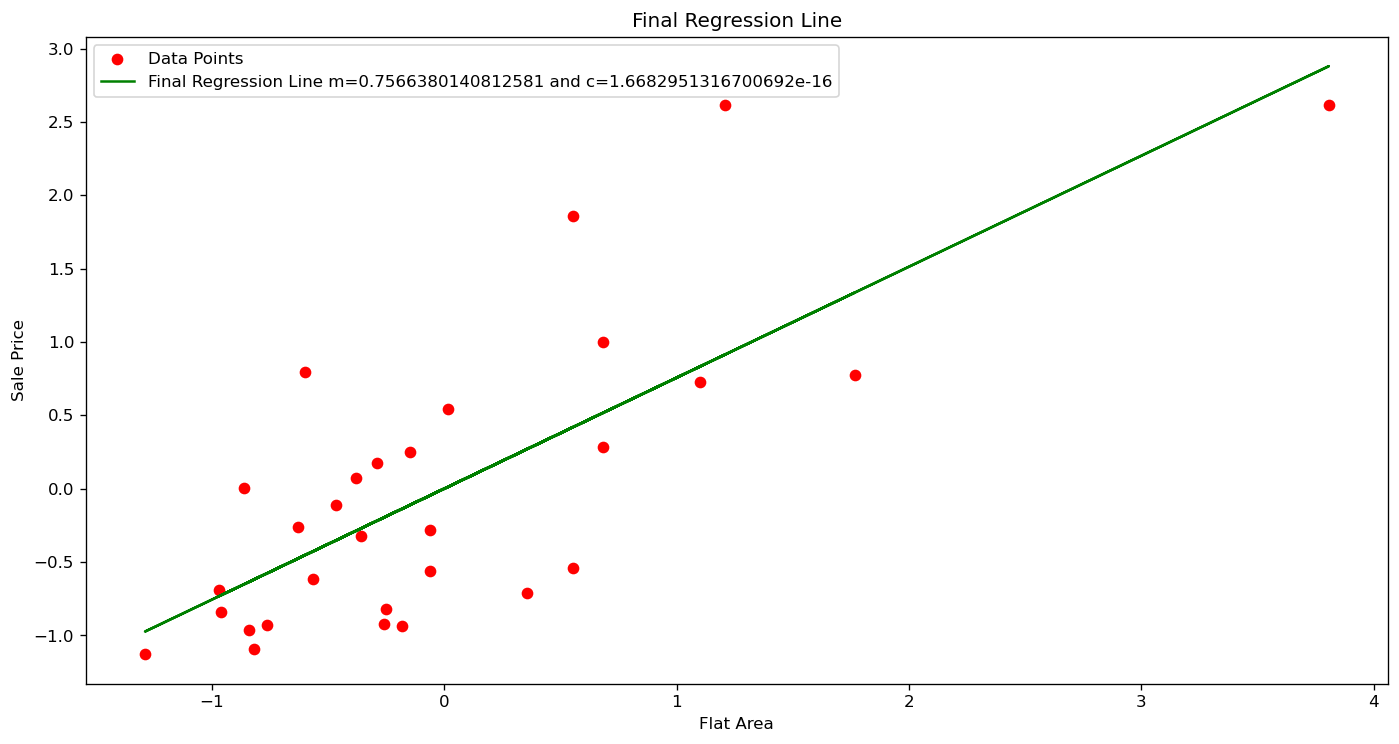

In [22]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
sale_price = scaler.fit_transform(sample_data['Sale_Price'].values.reshape(-1,1))
flat_Area = scaler.fit_transform(sample_data['flat_Area'].values.reshape(-1,1))

max_iter=1000
cost_old=0
alpha=0.01
m,c=param_init(Y=sale_price)

for i in range(0,max_iter):
    pred= predictor(m , c, flat_Area)
    cost_new=costCompute(pred,sale_price)
    if abs(cost_new - cost_old) <10**(-7):
        break
    Gm,Gc=gradients(pred,sale_price,flat_Area)
    m,c=paramUpdate(m,c,Gm,Gc,alpha)
    if(i%20 ==0):
        print('iteration: ',i,' m= ', m,' c= ',c,' cost= ',cost_new)
    cost_old=cost_new
result(m,c,flat_Area,sale_price,pred,i)
    